# QUESTION 1

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

2025-08-28 08:32:23.360299: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-28 08:32:23.530156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-28 08:32:24.087504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# A. Create a dataset of 10,000 samples with 51-time steps each 

In [2]:
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) 
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) 
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5) 
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_samples = 10000
n_steps = 51  
series = generate_time_series(n_samples, n_steps)

In [4]:
X = series[:, :50]
y = series[:, -1] 

# B. Split the dataset in the ratio training: validation: testing = 70:20:10.

In [5]:
train_size = int(0.7 * n_samples)
val_size = int(0.2 * n_samples)

In [6]:
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# C) i. Fully connected neural network.

In [8]:
X_train_fc = X_train.reshape(train_size, 50)
X_val_fc = X_val.reshape(val_size, 50)
X_test_fc = X_test.reshape(len(X_test), 50)


In [9]:
fc_model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(50,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

fc_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
fc_history = fc_model.fit(X_train_fc, y_train,
                          validation_data=(X_val_fc, y_val),
                          epochs=20, batch_size=32)

Epoch 1/20


2025-08-28 08:34:54.262689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-28 08:34:54.482533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-28 08:34:54.487460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

219/219 [==============================] - 1s 2ms/step - loss: 0.0276 - mae: 0.1180 - val_loss: 0.0076 - val_mae: 0.0697
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0060 - mae: 0.0615 - val_loss: 0.0053 - val_mae: 0.0574
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0536 - val_loss: 0.0048 - val_mae: 0.0551
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0496 - val_loss: 0.0044 - val_mae: 0.0524
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0471 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0453 - val_loss: 0.0042 - val_mae: 0.0522
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0030 - mae:

# ii) Simple RNN with one hidden layer and one output layer.

In [10]:
rnn1_model = models.Sequential([
    layers.SimpleRNN(64, activation="tanh", input_shape=(50,1)),
    layers.Dense(1)
])

rnn1_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
rnn1_history = rnn1_model.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=20, batch_size=32)


Epoch 1/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0109 - mae: 0.0740 - val_loss: 0.0044 - val_mae: 0.0540
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0037 - mae: 0.0489 - val_loss: 0.0031 - val_mae: 0.0449
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0032 - mae: 0.0454 - val_loss: 0.0033 - val_mae: 0.0465
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030 - mae: 0.0443 - val_loss: 0.0028 - val_mae: 0.0427
Epoch 5/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0029 - mae: 0.0431 - val_loss: 0.0034 - val_mae: 0.0471
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029 - mae: 0.0435 - val_loss: 0.0027 - val_mae: 0.0425
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029 - mae: 0.0433 - val_loss: 0.0035 - val_mae: 0.0474
Epoch 8/20
219/219 [==============================] - 2s 7ms/step - loss: 0.

# iii) Simple RNN with two hidden layer and one output layer.

In [11]:
rnn2_model = models.Sequential([
    layers.SimpleRNN(64, activation="tanh", return_sequences=True, input_shape=(50,1)),
    layers.SimpleRNN(32, activation="tanh"),
    layers.Dense(1)
])

rnn2_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
rnn2_history = rnn2_model.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=20, batch_size=32)


Epoch 1/20
219/219 [==============================] - 5s 18ms/step - loss: 0.0158 - mae: 0.0807 - val_loss: 0.0035 - val_mae: 0.0480
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0036 - mae: 0.0483 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031 - mae: 0.0447 - val_loss: 0.0028 - val_mae: 0.0426
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - mae: 0.0434 - val_loss: 0.0032 - val_mae: 0.0452
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - mae: 0.0432 - val_loss: 0.0029 - val_mae: 0.0431
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0027 - val_mae: 0.0421
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - mae: 0.0435 - val_loss: 0.0028 - val_mae: 0.0425
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - 

In [12]:
print("Fully Connected NN Test:")
fc_model.evaluate(X_test_fc, y_test)

print("\nSimple RNN (1 layer) Test:")
rnn1_model.evaluate(X_test, y_test)

print("\nSimple RNN (2 layers) Test:")
rnn2_model.evaluate(X_test, y_test)


Fully Connected NN Test:
32/32 [==============================] - 0s 864us/step - loss: 0.0031 - mae: 0.0444

Simple RNN (1 layer) Test:
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0411

Simple RNN (2 layers) Test:
32/32 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0412


[0.002624042332172394, 0.041199278086423874]

# QUESTION 2

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras import layers, models


In [15]:
df = pd.read_csv("google_stock.csv")

In [16]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


# A. Build a Simple RNN model with 2 hidden layers and 1 Dense layer to predict the stock price for the years 2020 and 2021.

In [17]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [18]:
data = df[['adjClose']].values

In [19]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
def create_sequences(data, seq_len=50):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 50
X, y = create_sequences(data_scaled, seq_len)

In [22]:
train_idx = df['date'] < '2020-01-01'
test_idx = df['date'] >= '2020-01-01'

In [23]:
train_size = np.sum(train_idx) - seq_len
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
dates_test = df['date'].values[seq_len:][train_size:]

In [24]:
model = models.Sequential([
    layers.SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(seq_len, 1)),
    layers.SimpleRNN(32, activation='tanh'),
    layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
22/22 [==============================] - 1s 24ms/step - loss: 0.0184 - mae: 0.0949 - val_loss: 0.0038 - val_mae: 0.0482
Epoch 2/30
22/22 [==============================] - 0s 18ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0027 - val_mae: 0.0416
Epoch 3/30
22/22 [==============================] - 0s 18ms/step - loss: 7.5697e-04 - mae: 0.0216 - val_loss: 0.0017 - val_mae: 0.0334
Epoch 4/30
22/22 [==============================] - 0s 19ms/step - loss: 6.6459e-04 - mae: 0.0202 - val_loss: 0.0016 - val_mae: 0.0326
Epoch 5/30
22/22 [==============================] - 0s 18ms/step - loss: 6.5190e-04 - mae: 0.0199 - val_loss: 0.0012 - val_mae: 0.0281
Epoch 6/30
22/22 [==============================] - 0s 19ms/step - loss: 5.7726e-04 - mae: 0.0187 - val_loss: 0.0011 - val_mae: 0.0267
Epoch 7/30
22/22 [==============================] - 0s 19ms/step - loss: 4.8613e-04 - mae: 0.0170 - val_loss: 7.9891e-04 - val_mae: 0.0232
Epoch 8/30
22/22 [==============================] - 0s 17ms

# B. Compare the accuracy using MAPE and MSE

In [25]:
# Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler.inverse_transform(y_test)

# Metrics
mse = mean_squared_error(y_test_rescaled, y_pred)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred)

print("MSE:", mse)
print("MAPE:", mape)


12/12 [==============================] - 0s 5ms/step
MSE: 64155.715512441195
MAPE: 0.09825881628708381


# C. Comment on how many epochs (dropouts) are required for adequate learning.

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_split=0.2, callbacks=[early_stop])


Epoch 1/50
22/22 [==============================] - 0s 20ms/step - loss: 1.3861e-04 - mae: 0.0088 - val_loss: 2.1692e-04 - val_mae: 0.0111
Epoch 2/50
22/22 [==============================] - 0s 19ms/step - loss: 1.4051e-04 - mae: 0.0089 - val_loss: 2.1987e-04 - val_mae: 0.0111
Epoch 3/50
22/22 [==============================] - 0s 18ms/step - loss: 1.3862e-04 - mae: 0.0088 - val_loss: 2.1284e-04 - val_mae: 0.0112
Epoch 4/50
22/22 [==============================] - 0s 19ms/step - loss: 1.8604e-04 - mae: 0.0105 - val_loss: 2.6468e-04 - val_mae: 0.0130
Epoch 5/50
22/22 [==============================] - 0s 19ms/step - loss: 1.5494e-04 - mae: 0.0095 - val_loss: 3.0787e-04 - val_mae: 0.0143
Epoch 6/50
22/22 [==============================] - 0s 19ms/step - loss: 1.8189e-04 - mae: 0.0104 - val_loss: 3.2267e-04 - val_mae: 0.0148
Epoch 7/50
22/22 [==============================] - 0s 18ms/step - loss: 1.4777e-04 - mae: 0.0092 - val_loss: 2.4060e-04 - val_mae: 0.0124
Epoch 8/50
22/22 [=========

# D.Plot the actual vs predicted values using the test data for the year 2020 and 2021.

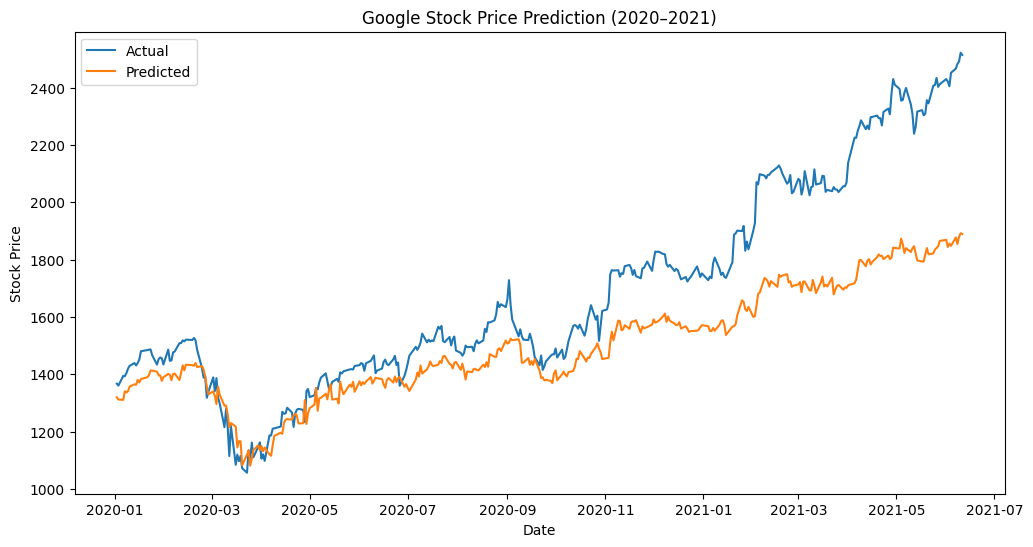

In [27]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test_rescaled, label="Actual")
plt.plot(dates_test, y_pred, label="Predicted")
plt.title("Google Stock Price Prediction (2020–2021)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


# QUESTION 3

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
df = pd.read_csv("Burglary_Dataset.csv")  
print(df.columns)

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Location 1', 'Total Incidents'],
      dtype='object')


In [101]:
df["CrimeDate"] = pd.to_datetime(df["CrimeDate"], errors="coerce")

In [102]:
df["Year"] = df["CrimeDate"].dt.year
df["Day"] = df["CrimeDate"].dt.date

In [103]:
larceny = df[df["CrimeCode"].astype(str).str.startswith("6")]
burglary = df[df["CrimeCode"].astype(str).str.startswith("5")]

In [104]:
LarcenyTs = larceny.groupby("Day").size()
BurglaryTs = burglary.groupby("Day").size()

In [106]:
LarcenyTs = LarcenyTs.reindex(pd.date_range("2014-01-01", "2016-12-31"), fill_value=0)
BurglaryTs = BurglaryTs.reindex(pd.date_range("2014-01-01", "2016-12-31"), fill_value=0)

In [107]:
train_cutoff = "2016-01-01"

larceny_train, larceny_test = LarcenyTs[:train_cutoff], LarcenyTs[train_cutoff:]
burglary_train, burglary_test = BurglaryTs[:train_cutoff], BurglaryTs[train_cutoff:]

In [109]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
look_back = 30  
batch_size = 32

larceny_gen = TimeseriesGenerator(larceny_train.values, larceny_train.values,
                                  length=look_back, batch_size=batch_size)

burglary_gen = TimeseriesGenerator(burglary_train.values, burglary_train.values,
                                   length=look_back, batch_size=batch_size)


In [110]:
def build_rnn():
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=(look_back, 1)),
        SimpleRNN(64, return_sequences=True),
        SimpleRNN(32, return_sequences=True),
        SimpleRNN(32),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model


In [111]:
def build_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(look_back, 1)),
        LSTM(64, return_sequences=True),
        LSTM(32, return_sequences=True),
        LSTM(32),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model


In [120]:
rnn_larceny = build_rnn()
rnn_larceny.fit(larceny_train_gen, validation_data=larceny_val_gen,
                epochs=50, callbacks=[early_stop], verbose=1)

lstm_larceny = build_lstm()
lstm_larceny.fit(larceny_train_gen, validation_data=larceny_val_gen,
                 epochs=50, callbacks=[early_stop], verbose=1)

# Burglary
rnn_burglary = build_rnn()
rnn_burglary.fit(burglary_train_gen, validation_data=burglary_val_gen,
                 epochs=50, callbacks=[early_stop], verbose=1)

lstm_burglary = build_lstm()
lstm_burglary.fit(burglary_train_gen, validation_data=burglary_val_gen,
                  epochs=50, callbacks=[early_stop], verbose=1)


Epoch 1/50
18/18 [==============================] - 2s 35ms/step - loss: 794.7569 - val_loss: 672.9699
Epoch 2/50
18/18 [==============================] - 0s 24ms/step - loss: 708.5229 - val_loss: 618.5548
Epoch 3/50
18/18 [==============================] - 0s 24ms/step - loss: 663.7973 - val_loss: 585.6233
Epoch 4/50
18/18 [==============================] - 0s 24ms/step - loss: 629.6251 - val_loss: 562.2245
Epoch 5/50
18/18 [==============================] - 0s 25ms/step - loss: 609.5484 - val_loss: 544.1689
Epoch 6/50
18/18 [==============================] - 0s 23ms/step - loss: 591.4573 - val_loss: 526.5234
Epoch 7/50
18/18 [==============================] - 0s 23ms/step - loss: 572.0640 - val_loss: 509.7458
Epoch 8/50
18/18 [==============================] - 0s 24ms/step - loss: 554.7807 - val_loss: 494.1203
Epoch 9/50
18/18 [==============================] - 0s 24ms/step - loss: 538.8991 - val_loss: 479.8317
Epoch 10/50
18/18 [==============================] - 0s 24ms/step - loss:

In [122]:
def make_forecast(model, train, test):
    history = list(train)
    preds = []
    for t in range(len(test)):
        x_input = np.array(history[-look_back:]).reshape((1, look_back, 1))
        yhat = model.predict(x_input, verbose=0)
        preds.append(yhat[0][0])
        history.append(test[t]) 
    return preds
larceny_rnn_pred = make_forecast(rnn_larceny, larceny_train.values, larceny_test.values)
larceny_lstm_pred = make_forecast(lstm_larceny, larceny_train.values, larceny_test.values)
burglary_rnn_pred = make_forecast(rnn_burglary, burglary_train.values, burglary_test.values)
burglary_lstm_pred = make_forecast(lstm_burglary, burglary_train.values, burglary_test.values)

In [123]:
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    plt.figure(figsize=(10,4))
    plt.plot(y_true, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(label)
    plt.legend()
    plt.show()

Larceny - RNN → RMSE: 13.45, MAE: 8.63


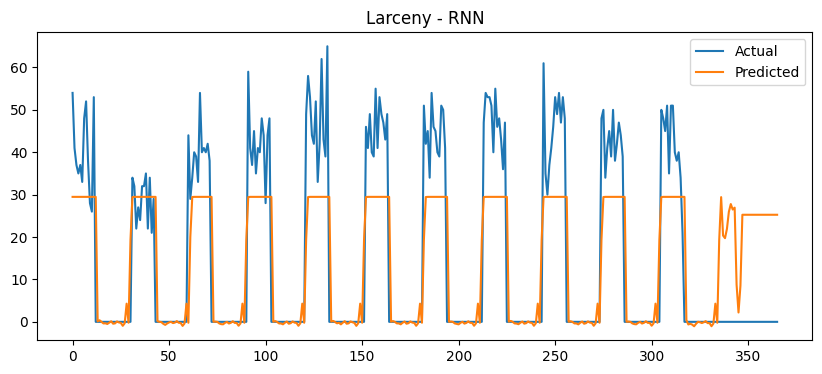

Larceny - LSTM → RMSE: 21.22, MAE: 20.15


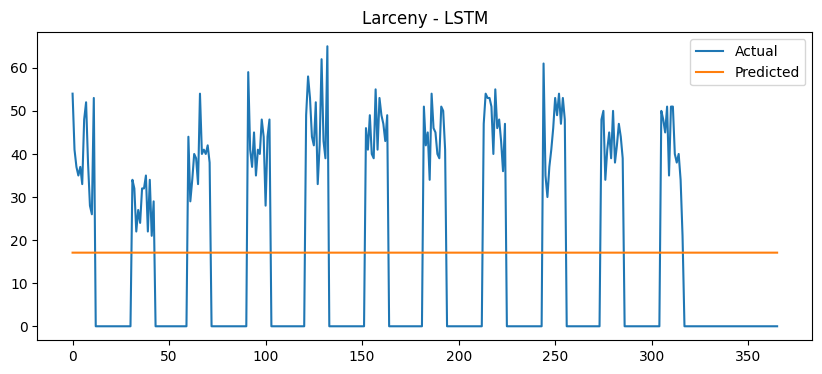

Burglary - RNN → RMSE: 8.65, MAE: 3.42


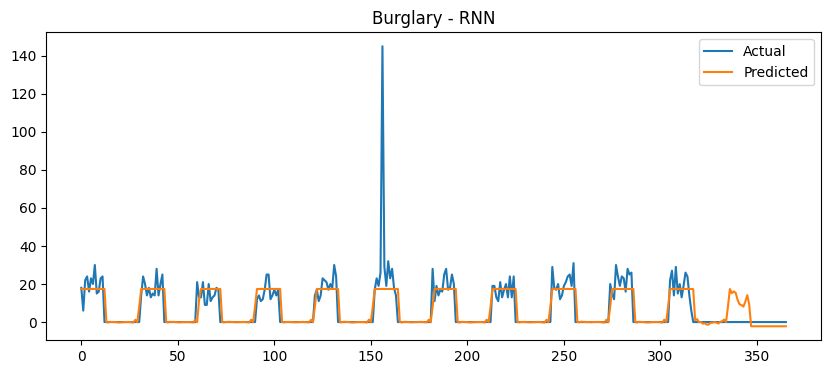

Burglary - LSTM → RMSE: 8.51, MAE: 3.13


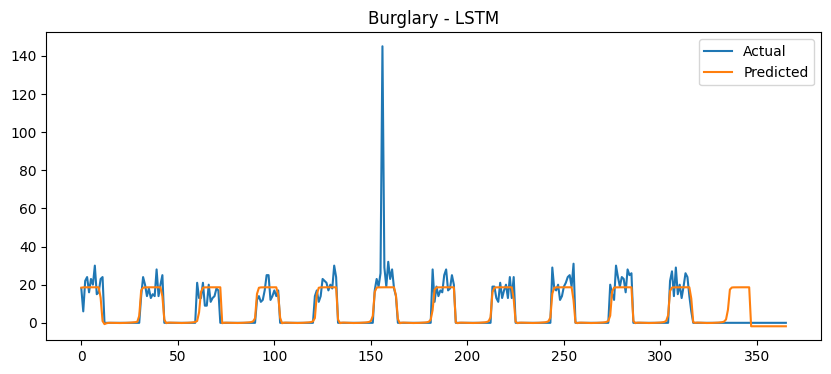

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
evaluate(larceny_test.values, larceny_rnn_pred, "Larceny - RNN")
evaluate(larceny_test.values, larceny_lstm_pred, "Larceny - LSTM")
evaluate(burglary_test.values, burglary_rnn_pred, "Burglary - RNN")
evaluate(burglary_test.values, burglary_lstm_pred, "Burglary - LSTM")